In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


## Project for fraud detection in card transactions
Antonio Montilla



## Introducción
La forma en que los consumidores realizamos nuestras compras habituales de bienes y servicios ha sufrido una gran trasnformación en las últimas décadas, caracterizada por el mayor uso de dinero electrónico como medio de pago. La bancarización en los países desarrollados ha alcanzado nuevos niveles de penetración, que, en conjunto con la masificación en el uso del internet, ha propulsado el comercio en linea, o e-commerce.

Con el desarrollo tecnológico, las transacciones que utilizan tarjetas de crédito/débito o, incluso, medios electrónicos de pago a través de dispositivos móviles (como Apple pay o Paypal), son cada vez más frecuentes. En España, por ejemplo, las transacciones de este tipo, es decir aquellas que se efectuan sin efectivo, ya superan el 10% del total de las compras para el año 2018, de acuerdo a estimaciones del Banco Central Europeo. En EEUU, la proporsión es de 75%, de acuerdo a a la Reserva Federal, mientras que en países como Suecia estas transacciones alcanzan niveles superiores al 80% del total, según estimaciones del Riksbank.

Sin embargo, este desarrollo del mercado bancario y del e-commerce ha traido consigo la proliferación de fraudes, ya sea a través del robo de los medios electrónicos de pago o simplemente mediante la usurpación de la identidad. Como referencia, el Banco Central Europeo estima que el fraude significa costes al sector financiero en torno a 1.800 millones de euros en la zona monetaria europea; en España la cifra se ubica en torna a 90 millones de euros. Desarrollar herramientas que permitan minimizar dichos costes resulta, definitivamente, crucial para la sostenibilidad y el desarrollo de estos avances tecnológicos en el consumo privado.

En este contexto, este proyecto intenta desarrollar modelos que permitirían predecir si una transacción es de índole fraudulante o no, a través del análisis y explotación de una base de datos que contiene información de 590.540 transacciones efectuadas en linea a través de la plataforma de Vesta. El proyecto evalúa las variables más relevantes para predecir la verocidad de una transacción, construye modelos y selecciona el que mejor se adapta a los datos.

El uso de este tipo de metodología, si aplicada masivamente en el mundo real, resultaría en una disminución significativa de las pérdidas ocasianadas por el fraude, tanto a instituciones financieras como al usuario final.



## Downloading libraries

In [2]:
# analisis de datos
import pandas as pd
import numpy as np
import random as rnd
from pandas import read_csv

# visualización
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE

#Principal components & otros
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


## Importing database from Kaggle

In [3]:
original = '../input/'
url1 = "/kaggle/input/ieee-fraud-detection/train_identity.csv"
url2 = "/kaggle/input/ieee-fraud-detection/train_transaction.csv"

train_identity = read_csv(url1)
train_transaction = read_csv(url2)


## Initial data exploration

El fichero train transaction contiene 394 columnas, incluyendo transaction ID como identificador de transacción, y 590.540 observaciones.

In [5]:
train_transaction.columns.values # listing the names of the variables

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

In [6]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
#inital data exploration of database identity
print('El tamaño del fichero train_identity es: ', train_identity.shape)
train_identity.columns.values # Nombre de las variables

El tamaño del fichero train_identity es:  (144233, 41)


array(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05',
       'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'], dtype=object)

The train identity file contains 41 columns, including transaction ID as the transaction identifier, and 144,233 observations.

Since this database contains fewer observations, I will proceed to join the two dataframes (using the _transaction ID_ column) and then delete the observations with null data.

In [8]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [9]:
#Due to saving memory, I will delete the ddbb _train transaction_ and _train identity_
del train_identity, train_transaction

In [10]:
#Data exploration of the full ddbb _train_
print('El tamaño del fichero train es: ', train.shape)

El tamaño del fichero train es:  (590540, 434)


As a whole, the database contains 590,540 observations and 434 columns.

In [11]:
train.columns.values # Name of the variables

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

The variables are grouped according to the following criteria:
* TransactionID, which represents the identifier of each transaction.
* TransactionDT, indicates time since transaction (in seconds).
* TransactionAmt, indicates the amount of the transaction (in USD).
* ProductCD, the product code of the transaction. Categorical variable.
* Card (01-06), information about the payment card, such as type, category, bank, country, among others. Categorical variables.
* Addr (01-02), customer and vendor address. Categorical variables.
* Dist (01-02), refers to the distance between the location of the client and the seller.
* Pemaildomain, the buyer's email domain. Categorical variable.
* Remaildomain, the seller's email domain. Categorical variable.
* C (01-14), hidden columns with encrypted data. They refer to counting variables, such as the number of addresses associated with the card, telephone numbers, email addresses, among others, for both the buyer and the seller.
* D (01-15), time variables, such as the time since the last transaction, among others.
* M (01-09), variables that indicate if there is a match between the purchase information. Categorical variables.
* V (01-339), variables provided by Vesta regarding the transaction, such as classification, count, among others.
* Id (01-138), hidden variables with encrypted data. They refer to identity data, which for data protection reasons cannot be disclosed. Personal data of the seller and buyer, data of the connection or equipment (IP, ISP, proxy).
* Devicetype, type of device used by the buyer. Categorical variable.
* Deviceinfo, information of the device used by the buyer. Categorical variable.


In [12]:
#Checking for missing values
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [13]:
total = train.isnull().sum().sort_values(ascending = False) #sumando valores nulos por columna
porcentaje = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False) #y % del total
missing_train_data  = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje']) #df para explorar
missing_train_data.head(50)

,Total,Porcentaje
id_24,585793,99.196159
id_25,585408,99.130965
id_07,585385,99.127070
id_08,585385,99.127070
id_21,585381,99.126393
id_26,585377,99.125715
id_22,585371,99.124699
id_23,585371,99.124699
id_27,585371,99.124699
dist2,552913,93.628374


In [14]:
missing_train_data.head(235)

,Total,Porcentaje
id_24,585793,99.196159
id_25,585408,99.130965
id_07,585385,99.127070
id_08,585385,99.127070
id_21,585381,99.126393
...,...,...
M1,271100,45.907136
D3,262878,44.514851
M6,169360,28.678836
V42,168969,28.612626


* The initial exploration suggests that certain columns contain a large amount of missing values, which can represent almost all of the data, that is, 99% of the total for certain identity variables.

* In total, 232 columns contain more than 40% of empty observations; the remaining 202 columns contain more than 70% of the loaded data, ie as non-null.

* As a first step, I proceed to remove the 232 columns with more than 40% null values. 

In [15]:
#I create new df with the columns with more than 70% of the observations
Train_new = train.drop(train.loc[:,list((100*(train.isnull().sum()/len(train.index))>30))].columns, 1)
#checking for NAs
total1 = Train_new.isnull().sum().sort_values(ascending = False) #sumando valores nulos por columna
porcentaje1 = (Train_new.isnull().sum()/Train_new.isnull().count()*100).sort_values(ascending = False) #y % del total
missing_train_data1  = pd.concat([total1, porcentaje1], axis=1, keys=['Total', 'Porcentaje']) #df para explorar
missing_train_data1.head(50)

,Total,Porcentaje
M6,169360,28.678836
V46,168969,28.612626
V42,168969,28.612626
V52,168969,28.612626
V51,168969,28.612626
V50,168969,28.612626
V49,168969,28.612626
V48,168969,28.612626
V47,168969,28.612626
V45,168969,28.612626


In [16]:
print('El tamaño del fichero train es: ', Train_new.shape)
Train_new.columns.values # Nombre de las variables

El tamaño del fichero train es:  (590540, 202)


array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'P_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1',
       'D4', 'D10', 'D15', 'M6', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35',
       'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44',
       'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53',
       'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
       'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
       'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89',
       'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98',
       

As the next case I proceed to eliminate the null observations, including both empty values and NAs, which will allow me to reduce the size of the dataframe

In [17]:
#new version of the df w/o null observations
Train_new2 = Train_new.dropna()
print('El tamaño del fichero train es: ', Train_new2.shape)

El tamaño del fichero train es:  (328198, 202)


In [18]:
#checking for missing values and nulls
total1 = Train_new2.isna().sum().sort_values(ascending = False) #sumando valores nulos por columna
porcentaje1 = (Train_new2.isna().sum()/Train_new2.isna().count()*100).sort_values(ascending = False) #y % del total
missing_train_data1  = pd.concat([total1, porcentaje1], axis=1, keys=['Total', 'Porcentaje']) #df para explorar
missing_train_data1.head(50)

,Total,Porcentaje
V321,0,0.0
V42,0,0.0
V52,0,0.0
V51,0,0.0
V50,0,0.0
V49,0,0.0
V48,0,0.0
V47,0,0.0
V46,0,0.0
V45,0,0.0


It confirms that there are no null or empty observations.
In this way, the dataframe has been reduced to 202 columns and 328,198 observations. As a next step, I'll test for the presence of empty values with possible special characters, like "?" or "missing".

In [19]:
interrogante = Train_new2.apply(lambda x: True if "?" in list(x) else False, axis=1)
numOfRows = len(interrogante[interrogante == True].index)
 
print('El número de observaciones con caracter ? es ', numOfRows)

El número de observaciones con caracter ? es  0


In [20]:
missing = Train_new2.apply(lambda x: True if "missing" in list(x) else False, axis=1)
numOfRows = len(interrogante[interrogante == True].index)
 
print('El número de observaciones con caracter missing es ', numOfRows)

El número de observaciones con caracter missing es  0


It is concluded that the dataframe _Train new2_ does not contain empty values, null values, or values with certain special characters.
Now I will proceed to carry out the Exploratory Data Analysis (EDA).

## Exploratory Data Analysis

This section will explore the database in more detail, in particular the behavior of the target variable _Is Fraud_ and its relationship to the other columns.

Due to the size of the database, I will proceed to extract a sample of 15% (50,000 data) of the total to facilitate the exploration of the data.

In [21]:
# Taking sample
Train_sample = Train_new2.sample(frac =.1524, random_state = 2)
print('El tamaño de la muestra de train es: ', Train_sample.shape)

El tamaño de la muestra de train es:  (50017, 202)


In [22]:
Train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
283519,3270519,0,6919702,49.00,W,2773,512.0,150.0,visa,166.0,...,0.0,59.0,59.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
376489,3363489,0,9409686,51.00,W,9480,170.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291295,3278295,0,7171827,59.00,W,11050,555.0,150.0,visa,226.0,...,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380779,3367779,0,9519176,54.47,W,12839,321.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559776,3546776,0,14833242,49.00,W,13366,437.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploration of the target variable _isFraud_

In [23]:
print("La variable objetivo _Is Fraud_ tiene {0} obervaciones y {1} son valores únicos.".format(Train_sample['isFraud'].count(),Train_sample['isFraud'].nunique()))

La variable objetivo _Is Fraud_ tiene 50017 obervaciones y 2 son valores únicos.


In [24]:
print(Train_sample['isFraud'].describe())

count    50017.000000
mean         0.019813
std          0.139360
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isFraud, dtype: float64


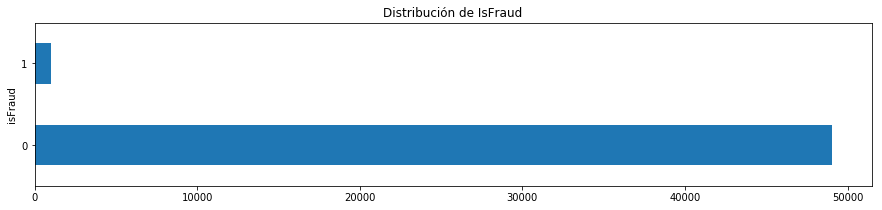

In [25]:
Train_sample.groupby('isFraud') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de IsFraud',
          figsize=(15, 3))
plt.show()

In [26]:
print(Train_sample['isFraud'].value_counts())

0    49026
1      991
Name: isFraud, dtype: int64


* The target variable takes values 0 (no fraud) and 1 (fraud).
* Only 991 of the observations are fraud, that is, 2% of the total. In principle, the low proportion of observations with fraud relative to non-fraud could affect the robusness of the estimators in the modeling, in the sense that estimation biases may occur.

Let's now proceed to evaluate the relationship with each subset of explanatory variables.

### TransactionDT
* Numeric column indicating time since transaction (in seconds)

In [27]:
#TransactionDT
print(Train_sample['TransactionDT'].describe())

count    5.001700e+04
mean     7.925901e+06
std      4.397069e+06
min      8.680800e+04
25%      4.225614e+06
50%      8.000837e+06
75%      1.157930e+07
max      1.581088e+07
Name: TransactionDT, dtype: float64


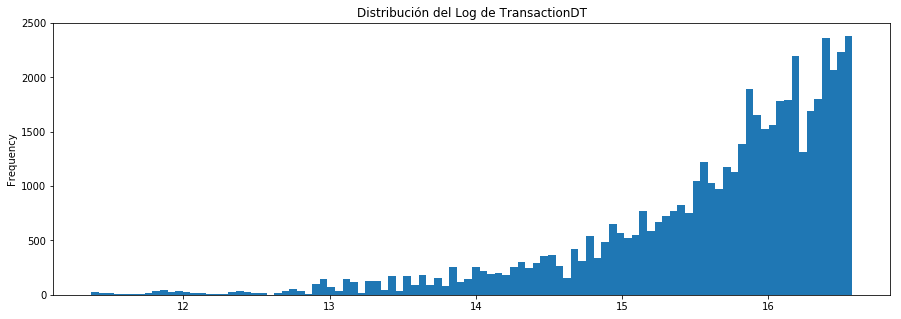

In [28]:
#Histogram in log, for smoothing
Train_sample['TransactionDT'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribución del Log de TransactionDT')
plt.show()

* Numerical variable that measures time since transaction.
* It is distributed with a positive slope: the data is concentrated in the highest values, that is, the mode is that the time elapsed since the transaction is the longest.

In [29]:
#relation with target variable
Train_sample[['TransactionDT', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,TransactionDT
0,0,7.930515e+06
1,1,7.697636e+06


In [30]:
print('La media de TransactionDT con IsFraud igual a 1 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['TransactionDT'].mean()))
print('La media de TransactionDT con IsFraud igual a 0 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['TransactionDT'].mean()))

La media de TransactionDT con IsFraud igual a 1 es: 7697635.8365
La media de TransactionDT con IsFraud igual a 0 es: 7930514.9634


* In general, it can be said that transactions with fraud tended to occur with less time since data collection.
* However, since the unit of time is seconds, there is not a big difference in the average time elapsed between transactions with fraud or not.
* A priori, the observation suggests that this column will not have a high explanatory level in _IsFraud_.

### TransactionAmt 

* Numerical variable that indicates the amount of the transaction, in USD.

In [31]:
#TransactionAmt
print(Train_sample['TransactionAmt'].describe())

count    50017.000000
mean       157.567401
std        268.202138
min          2.000000
25%         49.000000
50%         82.000000
75%        158.950000
max       5279.950000
Name: TransactionAmt, dtype: float64


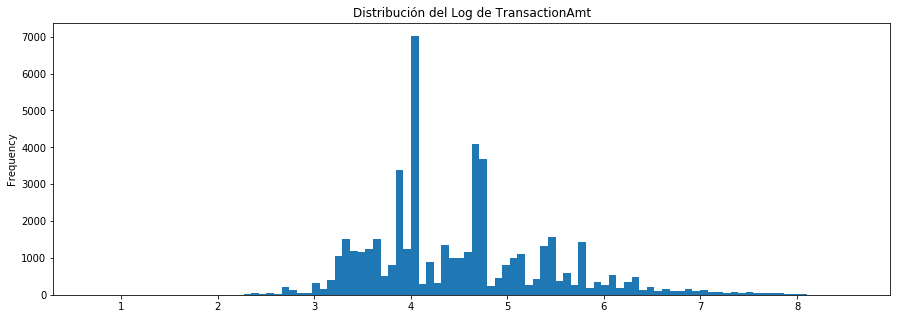

In [32]:
#Histogram in log, for smoothing
Train_sample['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribución del Log de TransactionAmt')
plt.show()

* On average, the amount of a transaction is around 160 USD; the minimum amount is 3.5 USD while the maximum is 4,843 USD
* The log of the series shows a distribution that resembles the normal

In [33]:
#relation with the target variable
Train_sample[['TransactionAmt', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,TransactionAmt
0,0,156.065233
1,1,231.881544


In [34]:
print('La media de TransactionAmt con IsFraud igual a 1 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['TransactionAmt'].mean()))
print('La media de TransactionAmt con IsFraud igual a 0 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['TransactionAmt'].mean()))

La media de TransactionAmt con IsFraud igual a 1 es: 231.8815
La media de TransactionAmt con IsFraud igual a 0 es: 156.0652


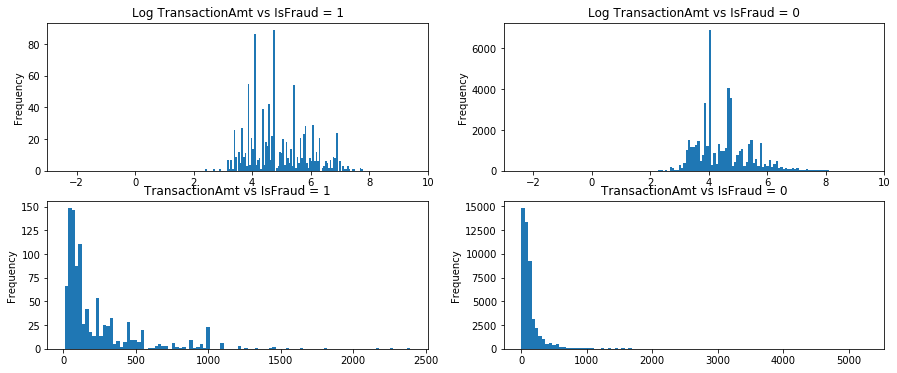

In [35]:
#Histogram TransactionAmt vs. IsFraud
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
Train_sample.loc[Train_sample['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log TransactionAmt vs IsFraud = 1',
          xlim=(-3, 10),
         ax= ax1)
Train_sample.loc[Train_sample['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log TransactionAmt vs IsFraud = 0',
          xlim=(-3, 10),
         ax=ax2)
Train_sample.loc[Train_sample['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='TransactionAmt vs IsFraud = 1',
         ax= ax3)
Train_sample.loc[Train_sample['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='TransactionAmt vs IsFraud = 0',
         ax=ax4)
plt.show()

* Fraudulent transactions, on average, tend to be for higher amounts (around 50%) than non-fradulent transactions, as would be expected a priori.
* This column will be relevant in predicting if a transaction is fraudulent.

### ProductCD 

* Categorical variable that indicates the product code of the transaction.

In [36]:
print(Train_sample['ProductCD'].value_counts())

W    50017
Name: ProductCD, dtype: int64


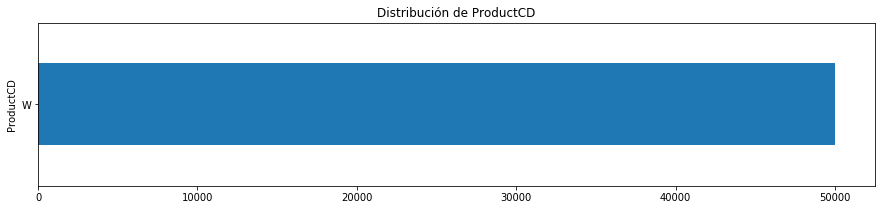

In [37]:
Train_sample.groupby('ProductCD') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de ProductCD',
          figsize=(15, 3))
plt.show()

* The exploration shows that the variable _ProductCD_ takes a single value (W), which is unusual.
* It must be contrasted with the distribution of the column in the full dataframe to verify that it is not a sampling problem.

In [38]:
print(Train_new2['ProductCD'].value_counts())

W    328198
Name: ProductCD, dtype: int64


* In the full database, the column also takes a single value.
* Due to the non-variability, I proceed to eliminate the column from my dataframe, both the sample and the population.

In [39]:
#Deleting _ProductCD_
Train_sample = Train_sample.drop(['ProductCD'], axis=1)
Train_new2 = Train_new2.drop(['ProductCD'], axis=1)

### Card1 - Card6
* Set of categorical columns that denote information about the payment card, such as type, category, bank, country, among others.

In [40]:
#creating a vector of the columns to facilitate exploration
card_cols = ["card1", "card2", "card3", "card4", "card5", "card6"]
Train_sample[card_cols].head(50)

,card1,card2,card3,card4,card5,card6
283519,2773,512.0,150.0,visa,166.0,debit
376489,9480,170.0,150.0,visa,226.0,debit
291295,11050,555.0,150.0,visa,226.0,credit
380779,12839,321.0,150.0,visa,226.0,debit
559776,13366,437.0,150.0,visa,226.0,debit
272252,2157,111.0,150.0,visa,226.0,debit
50896,11207,361.0,150.0,visa,226.0,debit
464563,15066,170.0,150.0,mastercard,102.0,credit
355230,3094,276.0,150.0,visa,226.0,debit
566435,12639,468.0,150.0,visa,166.0,debit


In [41]:
Train_sample[card_cols].tail(50)

,card1,card2,card3,card4,card5,card6
152200,11233,321.0,150.0,visa,195.0,debit
482668,3821,111.0,150.0,mastercard,219.0,credit
307808,16132,111.0,150.0,visa,226.0,debit
574097,3821,111.0,150.0,mastercard,219.0,credit
410605,4670,555.0,150.0,visa,226.0,debit
391194,14290,512.0,150.0,visa,226.0,debit
514705,9500,321.0,150.0,visa,226.0,debit
547771,9692,174.0,150.0,visa,195.0,debit
327648,7826,481.0,150.0,mastercard,224.0,debit
298468,11207,361.0,150.0,visa,226.0,debit


* _Card4_ es categórica e indica el tipo de la tarjeta usada en la operación (visa, mastercard). 
* _Card6_ es categórica e indica la categoría de la tarjeta usada (débito, crédito).
* _Card1, Card2, Card3 y Card5, son numéricas indicando categoría de clasificación de la tarjeta, como código país, banco, antiguedad. El significado no es revelado.

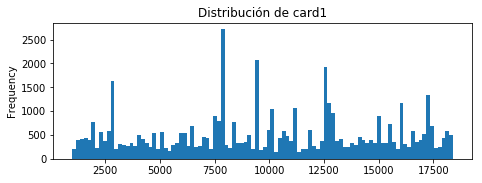

In [42]:
#Distribution of _Card1_
Train_sample['card1'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribución de card1')
plt.show()

In [43]:
#Distribution of _Card1_ relative to IsFraud
Train_sample[['card1', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,card1
0,0,9931.221658
1,1,10036.900101


* There is no clear distinction of this card classification relative to the target variable.
* This behavior also applies to _Card1, Card2 and Card5_ (below the graphs and tables).

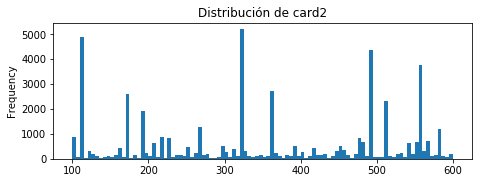

In [44]:
#Distribution of _Card2_
Train_sample['card2'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribución de card2')
plt.show()

In [45]:
#Distribution of _Card2_ relative to IsFraud
Train_sample[['card2', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,card2
0,0,349.183515
1,1,375.783047


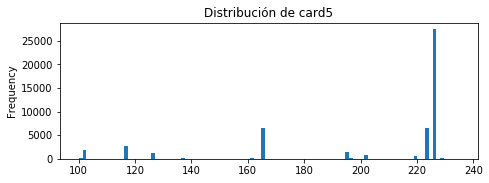

In [46]:
#Distribution of _Card5_
Train_sample['card5'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribución de card5')
plt.show()

In [47]:
#Distribution of _Card5_ relative to IsFraud
Train_sample[['card5', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,card5
0,0,202.505956
1,1,202.629667


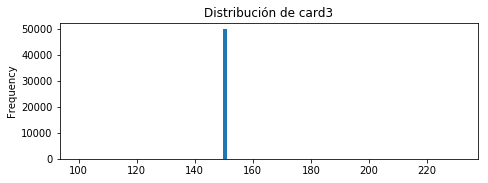

In [48]:
#Distribution of _Card3_
Train_sample['card3'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribución de card3')
plt.show()

* The variable takes a single value (150), which probably refers to the country code of the card (USA).
* I evaluate the distribution in the full data to contrast.

In [49]:
#unique values of _Card3_ in the full ddbb 
print(Train_new2['card3'].value_counts())

150.0    327558
143.0       391
159.0        42
144.0        28
100.0        21
194.0        20
135.0        13
146.0        12
118.0        11
162.0        10
149.0         8
133.0         8
204.0         6
188.0         5
109.0         5
223.0         4
142.0         4
141.0         4
219.0         4
191.0         3
117.0         3
156.0         3
220.0         2
189.0         2
185.0         2
227.0         2
231.0         2
179.0         2
183.0         2
134.0         1
137.0         1
148.0         1
153.0         1
119.0         1
170.0         1
175.0         1
176.0         1
177.0         1
180.0         1
182.0         1
195.0         1
197.0         1
208.0         1
105.0         1
106.0         1
107.0         1
217.0         1
111.0         1
229.0         1
129.0         1
Name: card3, dtype: int64


* Although it does show multiple unique values, these are insignificant in terms of sample size: the second most repeated category includes less than 0.1% of all data.
* I therefore proceed to eliminate the variable from the databases, both sample and total.

In [50]:
#Deleting _card3_
Train_sample = Train_sample.drop(['card3'], axis=1)
Train_new2 = Train_new2.drop(['card3'], axis=1)

In [51]:
#Distribution of variable _Card4_ y _Card6_ referring to the type of card
#_Card4_
print(Train_sample['card4'].value_counts())

visa          33298
mastercard    16418
discover        301
Name: card4, dtype: int64


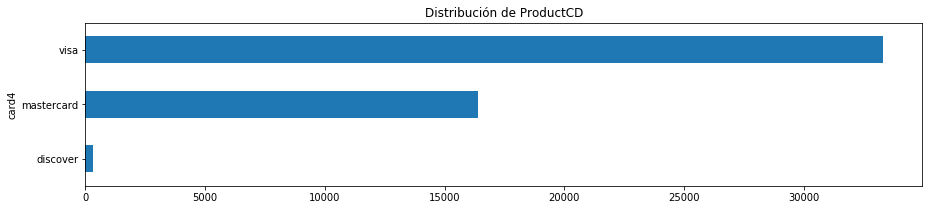

In [52]:
Train_sample.groupby('card4') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de ProductCD',
          figsize=(15, 3))
plt.show()

In [53]:
#_Card6_
print(Train_sample['card6'].value_counts())

debit              42438
credit              7575
debit or credit        4
Name: card6, dtype: int64


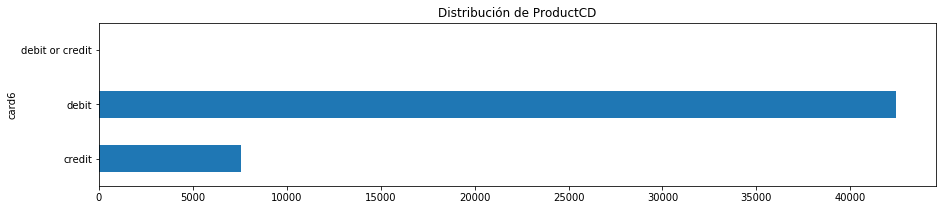

In [54]:
Train_sample.groupby('card6') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de ProductCD',
          figsize=(15, 3))
plt.show()

* Transactions are predominantly made through visa debit cards.
* Mastercard is the second card type option
* Credit is the second option in terms of category

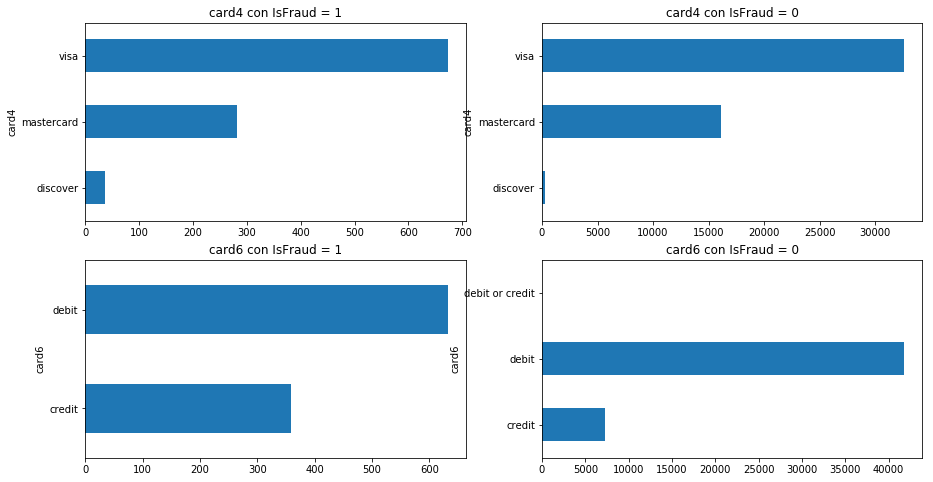

In [55]:
#Evaluating relationship with target variable _IsFraud_
Train_sample_fr1 = Train_sample.loc[Train_sample['isFraud'] == 1]
Train_sample_fr0 = Train_sample.loc[Train_sample['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
Train_sample_fr1.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='card4 con IsFraud = 1')
Train_sample_fr0.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='card4 con IsFraud = 0')
Train_sample_fr1.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='card6 con IsFraud = 1')
Train_sample_fr0.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='card6 con IsFraud = 0')
plt.show()

* In terms of card type, there is not a great distinction between fraud and non-fraud operations.
* This is also true for the category, although, to certain margin, credit cards tend to have a greater relative weight in fraud transactions.
* Now the columns will be factorized, both in the sample and in the total DDBB.

In [56]:
#Card_4
Train_sample['visa'] = np.where(Train_sample['card4'] == 'visa', 1, 0)
print(Train_sample['visa'].value_counts())
Train_sample['mastercard'] = np.where(Train_sample['card4'] == 'mastercard', 1, 0)
print(Train_sample['mastercard'].value_counts())
Train_new2['visa'] = np.where(Train_new2['card4'] == 'visa', 1, 0)
Train_new2['mastercard'] = np.where(Train_new2['card4'] == 'mastercard', 1, 0)

#Card_6
Train_sample['debit'] = np.where(Train_sample['card6'] == 'debit', 1, 0)
print(Train_sample['debit'].value_counts())
Train_sample['credit'] = np.where(Train_sample['card6'] == 'credit', 1, 0)
print(Train_sample['credit'].value_counts())
Train_new2['debit'] = np.where(Train_new2['card6'] == 'debit', 1, 0)
Train_new2['credit'] = np.where(Train_new2['card6'] == 'credit', 1, 0)

#Deleting from both DDBB (full and sample)
Train_sample = Train_sample.drop(['card4'], axis=1)
Train_new2 = Train_new2.drop(['card4'], axis=1)
Train_sample = Train_sample.drop(['card6'], axis=1)
Train_new2 = Train_new2.drop(['card6'], axis=1)


1    33298
0    16719
Name: visa, dtype: int64
0    33599
1    16418
Name: mastercard, dtype: int64
1    42438
0     7579
Name: debit, dtype: int64
0    42442
1     7575
Name: credit, dtype: int64


### Addr 01-02 
* Variables that indicate buyer and seller address. No additional information is disclosed.

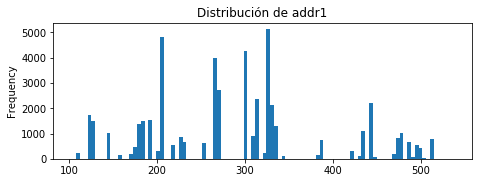

In [57]:
#Distribution of _Addr1_
Train_sample['addr1'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribución de addr1')
plt.show()

In [58]:
#Distribution of _Addr1_ relative to IsFraud
Train_sample[['addr1', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,addr1
0,0,289.137600
1,1,291.150353


* Column Addr1 is relatively evenly distributed in the data.
* No significant distinction is observed, a priori, in this column regarding whether there is fraud or not.

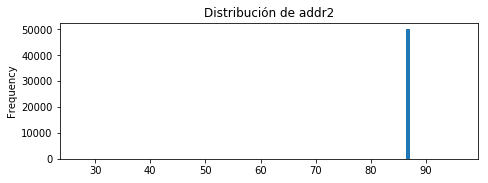

In [59]:
#Distribution of _Addr2_
Train_sample['addr2'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribución de addr2')
plt.show()

* The _addr2_ column takes a unique value in the sample.
* I will evaluate its distribution in the full ddbb.

In [60]:
#Unique values of _addr2_ in the total DDBB 
print(Train_new2['addr2'].value_counts())

87.0    328126
96.0        35
27.0        17
34.0         8
61.0         3
40.0         3
16.0         2
32.0         2
59.0         1
73.0         1
Name: addr2, dtype: int64


* Due to the non-variability in the column, I proceed to eliminate it from the databases

In [61]:
#Deleting column _addr2_ from both DDBB
Train_sample = Train_sample.drop(['addr2'], axis=1)
Train_new2 = Train_new2.drop(['addr2'], axis=1)

### _Pemaildomain_
* the buyer's email domain. Categorical variable.

In [62]:
print(Train_sample['P_emaildomain'].value_counts())

gmail.com          24069
yahoo.com          12424
aol.com             3422
anonymous.com       2523
hotmail.com         2268
comcast.net          763
icloud.com           731
att.net              480
msn.com              444
outlook.com          365
live.com             328
sbcglobal.net        325
verizon.net          281
ymail.com            276
bellsouth.net        207
me.com               126
optonline.net        107
cox.net              103
charter.net           78
rocketmail.com        69
earthlink.net         60
mail.com              59
gmail                 41
windstream.net        38
netzero.net           36
aim.com               36
roadrunner.com        33
netzero.com           33
twc.com               32
juno.com              27
embarqmail.com        25
frontiernet.net       25
centurylink.net       24
frontier.com          23
cfl.rr.com            21
q.com                 20
mac.com               19
sc.rr.com             18
suddenlink.net        17
cableone.net          10


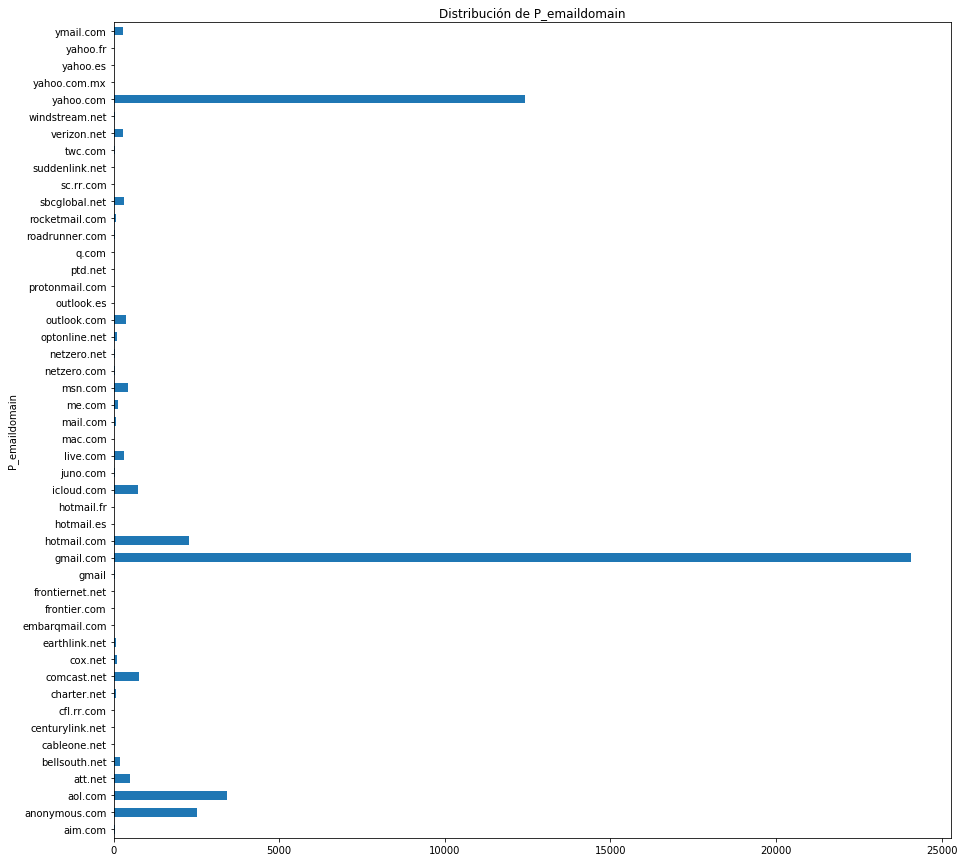

In [63]:
Train_sample.groupby('P_emaildomain') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de P_emaildomain',
          figsize=(15, 15))
plt.show()

In [64]:
#Evaluating relationship with target variable _IsFraud_
#Fraud
Train_sample_fr1 = Train_sample.loc[Train_sample['isFraud'] == 1]
print(Train_sample_fr1['P_emaildomain'].value_counts())

gmail.com         501
yahoo.com         244
aol.com            74
comcast.net        33
hotmail.com        30
anonymous.com      28
icloud.com         13
bellsouth.net      10
msn.com            10
outlook.com         7
mail.com            7
aim.com             6
live.com            5
cox.net             4
ymail.com           3
mac.com             3
gmail               2
att.net             2
sbcglobal.net       2
verizon.net         2
charter.net         2
optonline.net       1
protonmail.com      1
embarqmail.com      1
Name: P_emaildomain, dtype: int64


In [65]:
#No fraud
Train_sample_fr0 = Train_sample.loc[Train_sample['isFraud'] == 0]
print(Train_sample_fr0['P_emaildomain'].value_counts())

gmail.com          23568
yahoo.com          12180
aol.com             3348
anonymous.com       2495
hotmail.com         2238
comcast.net          730
icloud.com           718
att.net              478
msn.com              434
outlook.com          358
live.com             323
sbcglobal.net        323
verizon.net          279
ymail.com            273
bellsouth.net        197
me.com               126
optonline.net        106
cox.net               99
charter.net           76
rocketmail.com        69
earthlink.net         60
mail.com              52
gmail                 39
windstream.net        38
netzero.net           36
roadrunner.com        33
netzero.com           33
twc.com               32
aim.com               30
juno.com              27
frontiernet.net       25
centurylink.net       24
embarqmail.com        24
frontier.com          23
cfl.rr.com            21
q.com                 20
sc.rr.com             18
suddenlink.net        17
mac.com               16
cableone.net          10


* For all transactions, gmail.com is the most common buyer email domain, followed by yahoo.com and aol.com
* No distinction is observed between the type of transaction, therefore I will remove the column from both the sample and the total ddbb

In [66]:
#Deleting column _P_emaildomain_ from both DDBB
Train_sample = Train_sample.drop(['P_emaildomain'], axis=1)
Train_new2 = Train_new2.drop(['P_emaildomain'], axis=1)

### _C 01-14_ 
* Hidden and encrypted columns.
* They refer to counting variables, such as the number of addresses associated with the card, telephone numbers, email addresses, among others.
* Data for both the buyer and the seller.

In [67]:
#Creating a dataframe with column set _C_ for exploration
c_cols = [c for c in Train_sample if c[0] == 'C']
c_df = Train_sample[c_cols]
c_df.head(50)
c_df.shape

(50017, 14)

* Due to the little information available from the 14 count columns C, I proceed to carry out a principal components analysis and extract new columns that synthesize the information.


shape of X_pca (50017, 14)
[8.59607630e-01 1.10905127e-01 2.03731083e-02 3.62888555e-03
 2.31792911e-03 1.39688952e-03 1.08026307e-03 4.73542682e-04
 2.16625145e-04 5.21031508e-34 1.21543143e-35 9.87315056e-37
 8.64711838e-38 1.96883153e-69]
suma: 0.9705127566482822


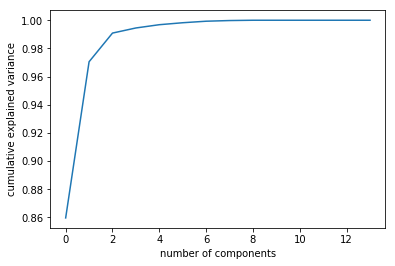

In [68]:
#PCA with columns _C 01-14_

#1) Normalising columns
scaler=StandardScaler()#instantiate
scaler.fit(c_df) 
X_scaled=scaler.transform(c_df)

#2) Applying PCA
pca=PCA(n_components=14)
pca.fit(X_scaled) # finding components
X_pca=pca.transform(X_scaled) 
#checking the shape of the array
print("shape of X_pca", X_pca.shape)

#3) Checking variability in PCAs
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* The principal component analysis allows explaining 97% of the variability of the data with only 2 new columns (i.e. components).
* I proceed to include these two components in the _Train sample_ database and delete the columns _C 01-14_.
* I will replicate later on this process in the full ddbb.

In [69]:
#Including the new two variables with components _C PCA1_ y _C PCA2_
Train_sample['C_PCA1'] = X_pca[:,0]
Train_sample['C_PCA2'] = X_pca[:,1]

#Deleting columns C
Train_sample = Train_sample.drop([c for c in c_cols], axis=1)

Train_sample.shape

(50017, 188)

shape of X_pca (328198, 14)
[8.61912049e-01 1.10925013e-01 1.83851073e-02 3.47538311e-03
 2.11431134e-03 1.38664634e-03 1.09354175e-03 4.80115181e-04
 2.27832678e-04 9.15159216e-35 1.69834359e-35 1.37023096e-36
 7.02667816e-38 8.38002411e-70]
suma: 0.9728370622720495


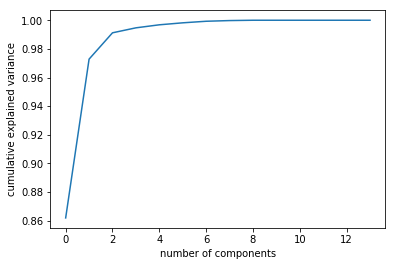

In [70]:
#Replicating procedure for original ddbb

#PCA en columnas _C 01-14_ en df _Train_new2_

c_df = Train_new2[c_cols]

#1) Normalising columns
scalerp=StandardScaler()
scalerp.fit(c_df) 
X_scaled=scalerp.transform(c_df)

#2) Applying PCA
pca=PCA(n_components=14)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#checking the shape of the array
print("shape of X_pca", X_pca.shape)

#3) Checking variability in PCA
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [71]:
#Adding these two new columns _C PCA1_ y _C PCA2_ in df _Train_new2_
Train_new2['C_PCA1'] = X_pca[:,0]
Train_new2['C_PCA2'] = X_pca[:,1]

#Deleting columns C
Train_new2 = Train_new2.drop([c for c in c_cols], axis=1)

Train_new2.shape

(328198, 188)

### _V 01-339_
* Set of 169 variables provided by Vesta regarding the transaction, such as classification, count, among others.
* They are numerical, however their meaning has been hidden.
* I proceed to replicate the principal component analysis steps, similar than for the variables _C_

In [72]:

v_cols = [v for v in Train_sample if v[0] == 'V']
v_df = Train_sample[v_cols]
v_df.head(50)
v_df.shape

(50017, 169)

shape of X_pca (50017, 20)
[0.13554661 0.06203605 0.05769581 0.05501869 0.04777282 0.03999866
 0.03601325 0.03478121 0.03386716 0.03257366 0.02749389 0.02517254
 0.02295787 0.01965682 0.01923539 0.01794953 0.01614754 0.01379603
 0.01291803 0.01230285]
suma: 0.7229344025673561


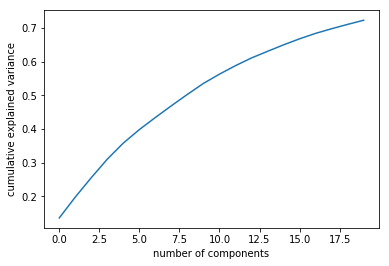

In [73]:
#PCA en columns _V 01-339_

#1) Normalising columns
scaler=StandardScaler()
scaler.fit(v_df) 
X_scaled=scaler.transform(v_df)

#2) Aplying PCA
pca=PCA(n_components=20)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
print("shape of X_pca", X_pca.shape)

#3) Checking variability in PCA
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:20]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* The principal component analysis allows explaining 74% of the variability of the data with 20 new columns (i.e. components).
* I proceed to include these twenty components in the _Train sample_ database and delete the columns _V 01-33_.
* Later on, I will replicate this process in the main base.

In [74]:
#Including these 20 new components in columns _V PCA1_ to _V PCA20_ in df _Train_new2_
Train_sample['V_PCA1'] = X_pca[:,0]
Train_sample['V_PCA2'] = X_pca[:,1]
Train_sample['V_PCA3'] = X_pca[:,2]
Train_sample['V_PCA4'] = X_pca[:,3]
Train_sample['V_PCA5'] = X_pca[:,4]
Train_sample['V_PCA6'] = X_pca[:,5]
Train_sample['V_PCA7'] = X_pca[:,6]
Train_sample['V_PCA8'] = X_pca[:,7]
Train_sample['V_PCA9'] = X_pca[:,8]
Train_sample['V_PCA10'] = X_pca[:,9]
Train_sample['V_PCA11'] = X_pca[:,10]
Train_sample['V_PCA12'] = X_pca[:,11]
Train_sample['V_PCA13'] = X_pca[:,12]
Train_sample['V_PCA14'] = X_pca[:,13]
Train_sample['V_PCA15'] = X_pca[:,14]
Train_sample['V_PCA16'] = X_pca[:,15]
Train_sample['V_PCA17'] = X_pca[:,16]
Train_sample['V_PCA18'] = X_pca[:,17]
Train_sample['V_PCA19'] = X_pca[:,18]
Train_sample['V_PCA20'] = X_pca[:,19]

#Deleting columnas V
Train_sample = Train_sample.drop([v for v in v_cols], axis=1)

Train_sample.shape

(50017, 39)

shape of X_pca (328198, 20)
[0.13337239 0.0616464  0.05525605 0.05287305 0.04722787 0.03893154
 0.03640289 0.03535679 0.03379905 0.03219767 0.02733258 0.02451509
 0.02267397 0.0194408  0.01911361 0.01717248 0.01616374 0.01405532
 0.01325255 0.01288859]
suma: 0.7136724453490919


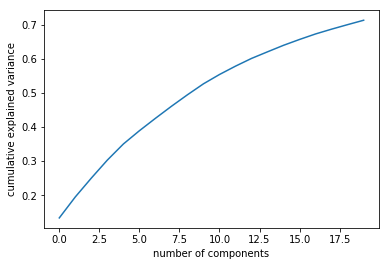

In [75]:
#Replicating for the main DDBB

#PCA in columns _V 01-_339 in df _Train_new2_

v_df = Train_new2[v_cols]

#1) Normalising columns
scalerp=StandardScaler()
scalerp.fit(v_df) 
X_scaled=scalerp.transform(v_df)

#2) Applying PCA
pca=PCA(n_components=20)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
print("shape of X_pca", X_pca.shape)

#3) Checking variability in PCA
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:20]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [76]:
#Including these 20 new components in columns _V PCA1_ to _V PCA20_ in df _Train_new2_
Train_new2['V_PCA1'] = X_pca[:,0]
Train_new2['V_PCA2'] = X_pca[:,1]
Train_new2['V_PCA3'] = X_pca[:,2]
Train_new2['V_PCA4'] = X_pca[:,3]
Train_new2['V_PCA5'] = X_pca[:,4]
Train_new2['V_PCA6'] = X_pca[:,5]
Train_new2['V_PCA7'] = X_pca[:,6]
Train_new2['V_PCA8'] = X_pca[:,7]
Train_new2['V_PCA9'] = X_pca[:,8]
Train_new2['V_PCA10'] = X_pca[:,9]
Train_new2['V_PCA11'] = X_pca[:,10]
Train_new2['V_PCA12'] = X_pca[:,11]
Train_new2['V_PCA13'] = X_pca[:,12]
Train_new2['V_PCA14'] = X_pca[:,13]
Train_new2['V_PCA15'] = X_pca[:,14]
Train_new2['V_PCA16'] = X_pca[:,15]
Train_new2['V_PCA17'] = X_pca[:,16]
Train_new2['V_PCA18'] = X_pca[:,17]
Train_new2['V_PCA19'] = X_pca[:,18]
Train_new2['V_PCA20'] = X_pca[:,19]

#Deleting columnas V
Train_new2 = Train_new2.drop([v for v in v_cols], axis=1)

Train_new2.shape


(328198, 39)

### _D1_ , _D4_ , _D10_ , _D15_
* Numerical variables that denote time, such as the time elapsed since the last transaction, among others.
* Its real meaning is hidden.
* I will individually explore its behavior as well as its relationship with the target variable _IsFraud_

In [77]:
#D1
#TransactionDT
print(Train_sample['D1'].describe())

count    50017.000000
mean       111.608533
std        166.098813
min          0.000000
25%          0.000000
50%         22.000000
75%        162.000000
max        638.000000
Name: D1, dtype: float64


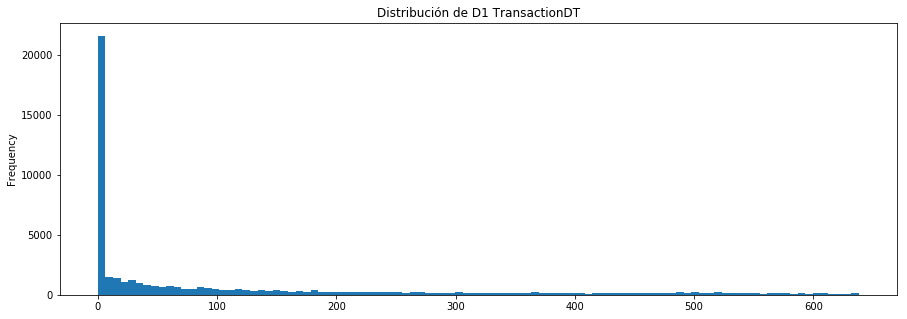

In [78]:
#Histogram of column D1
Train_sample['D1'] \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribución de D1 TransactionDT')
plt.show()

In [79]:
#relation with target column
Train_sample[['D1', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,D1
0,0,112.581814
1,1,63.459132


In [80]:
print('La media de D1 con IsFraud igual a 1 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['D1'].mean()))
print('La media de D1 con IsFraud igual a 0 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['D1'].mean()))

La media de D1 con IsFraud igual a 1 es: 63.4591
La media de D1 con IsFraud igual a 0 es: 112.5818


* A relevant difference is observed in this column between fraudulent and non-fraud transactions: for observations with fraud, D1 tends to be almost half that for non-fraud. 

In [81]:
#D4
#TransactionDT
print(Train_sample['D4'].describe())

count    50017.000000
mean       156.522122
std        196.362883
min          0.000000
25%          0.000000
50%         49.000000
75%        294.000000
max        675.000000
Name: D4, dtype: float64


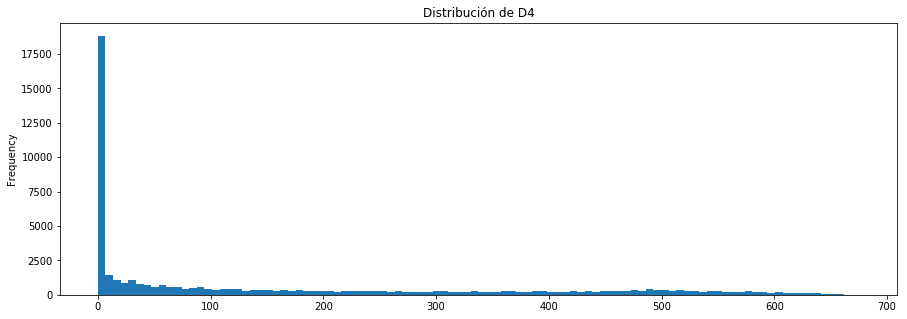

In [82]:
#Histogram of column D4
Train_sample['D4'] \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribución de D4')
plt.show()

In [83]:
#relation with target column
Train_sample[['D4', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,D4
0,0,157.658120
1,1,100.322906


In [84]:
print('La media de D4 con IsFraud igual a 1 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['D4'].mean()))
print('La media de D4 con IsFraud igual a 0 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['D4'].mean()))

La media de D4 con IsFraud igual a 1 es: 100.3229
La media de D4 con IsFraud igual a 0 es: 157.6581


* As with D1, this column shows a differentiated behavior with respect to the values of the target variable: it tends to be 50% higher in non-fraud transactions.

In [85]:
#D10
#TransactionDT
print(Train_sample['D10'].describe())

count    50017.000000
mean       137.638923
std        187.192852
min          0.000000
25%          0.000000
50%         33.000000
75%        234.000000
max        672.000000
Name: D10, dtype: float64


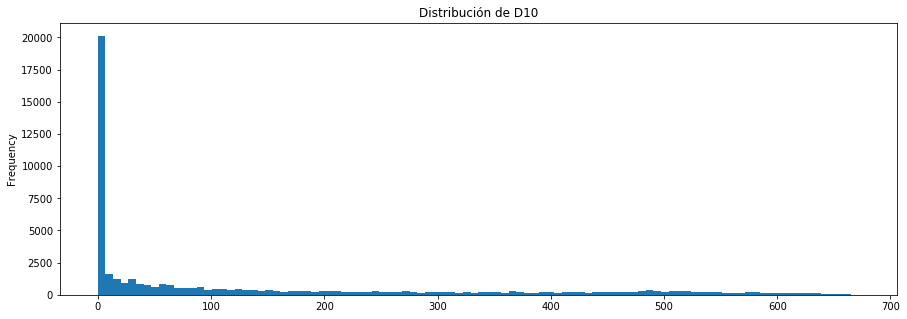

In [86]:
#Histogram of column D10
Train_sample['D10'] \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribución de D10')
plt.show()

In [87]:
#relation with target column
Train_sample[['D10', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,D10
0,0,138.615469
1,1,89.327952


In [88]:
print('La media de D10 con IsFraud igual a 1 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['D10'].mean()))
print('La media de D10 con IsFraud igual a 0 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['D10'].mean()))

La media de D10 con IsFraud igual a 1 es: 89.3280
La media de D10 con IsFraud igual a 0 es: 138.6155


* As with D1 and D4, this column shows a differentiated behavior with respect to the values of the target variable: it tends to be 50% higher in non-fraud transactions.

In [89]:
#D15
#TransactionDT
print(Train_sample['D15'].describe())

count    50017.000000
mean       178.084971
std        205.399919
min          0.000000
25%          0.000000
50%         76.000000
75%        343.000000
max        668.000000
Name: D15, dtype: float64


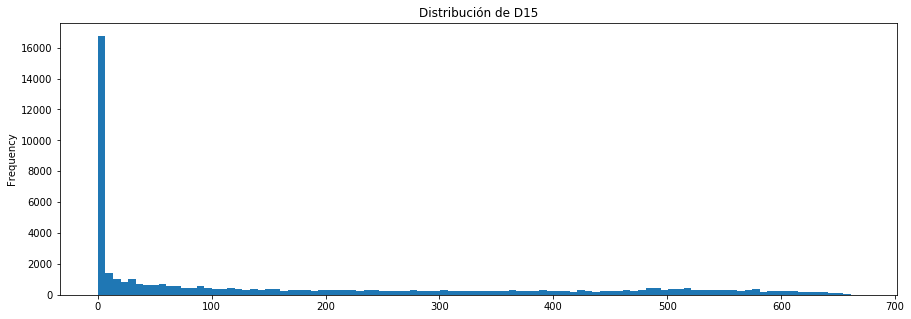

In [90]:
#Histogram of column D15
Train_sample['D15'] \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribución de D15')
plt.show()

In [91]:
#relation with target
Train_sample[['D15', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,D15
0,0,179.468119
1,1,109.658930


In [92]:
print('La media de D15 con IsFraud igual a 1 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['D15'].mean()))
print('La media de D15 con IsFraud igual a 0 es: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['D15'].mean()))

La media de D15 con IsFraud igual a 1 es: 109.6589
La media de D15 con IsFraud igual a 0 es: 179.4681


* Distribution and relationship with target variable similar to the other columns D

### _M6_
* Categorical variable that denotes if there is a match between the purchase information.

In [93]:
print(Train_sample['M6'].value_counts())

F    26932
T    23085
Name: M6, dtype: int64


* _M6_ takes values 'F' (False) if there is no match and 'T' (True) if there is a match
* I will proceed to replace the observations with 'T' for 1 and 'F' for 0, so that I can see the distribution and relationship with the target column

In [94]:
#Transforming column _M6_, T == 1
Train_sample['M6'] = np.where(Train_sample['M6'] == 'T', 1, 0)
print(Train_sample['M6'].value_counts())

#Replicating for main ddbb
Train_new2['M6'] = np.where(Train_new2['M6'] == 'T', 1, 0)
print(Train_new2['M6'].value_counts())

0    26932
1    23085
Name: M6, dtype: int64
0    176848
1    151350
Name: M6, dtype: int64


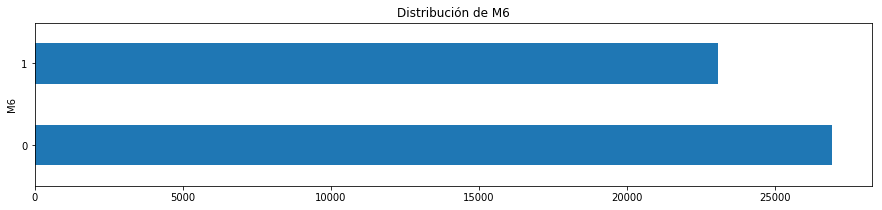

In [95]:
Train_sample.groupby('M6') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de M6',
          figsize=(15, 3))
plt.show()

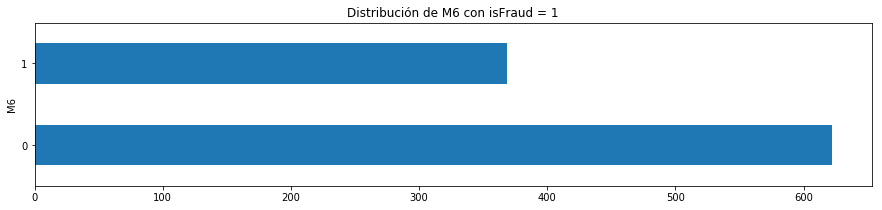

In [96]:
#relation with target
#fraud
Train_sample_fr1 = Train_sample.loc[Train_sample['isFraud'] == 1]
Train_sample_fr1.groupby('M6') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de M6 con isFraud = 1',
          figsize=(15, 3))
plt.show()

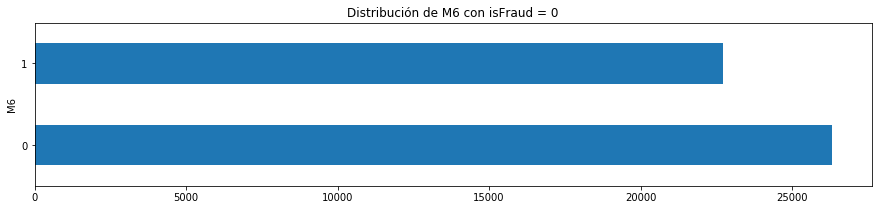

In [97]:
#No fraud
Train_sample_fr0 = Train_sample.loc[Train_sample['isFraud'] == 0]
Train_sample_fr0.groupby('M6') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribución de M6 con isFraud = 0',
          figsize=(15, 3))
plt.show()

* In line with what is expected, in fraudulent transactions the proportion of observations in which there is no match in the information (with respect to the total) tends to be notably higher than in those transactions that are not fraudulent.
* This column should have an explanatory power in the _IsFraud_ modeling

# EDA Summary
* The exploratory analysis allowed on balance to reduce the database from 202 columns to only 39, including the factored categorical columns, which will help in the modeling and evaluation process.
* The process requiered the elimination of empty and null data, transformations of variables, analysis of principal components and factorization of certain categorical variables.
* The risk that the database is unbalanced was also identified: the target variable includes only 2% of the observations as fraud. This could cause problems in the modeling process.
* As an additional step, I will proceed to perform feature engineering analysis before modeling.

In [98]:
#Creating a backup
Train_sample_bk = Train_sample
Train_new2_bk = Train_new2

In [99]:
Train_new2_bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328198 entries, 1 to 590539
Data columns (total 39 columns):
TransactionID     328198 non-null int64
isFraud           328198 non-null int64
TransactionDT     328198 non-null int64
TransactionAmt    328198 non-null float64
card1             328198 non-null int64
card2             328198 non-null float64
card5             328198 non-null float64
addr1             328198 non-null float64
D1                328198 non-null float64
D4                328198 non-null float64
D10               328198 non-null float64
D15               328198 non-null float64
M6                328198 non-null int64
visa              328198 non-null int64
mastercard        328198 non-null int64
debit             328198 non-null int64
credit            328198 non-null int64
C_PCA1            328198 non-null float64
C_PCA2            328198 non-null float64
V_PCA1            328198 non-null float64
V_PCA2            328198 non-null float64
V_PCA3            328198 

### Correlation Matrix

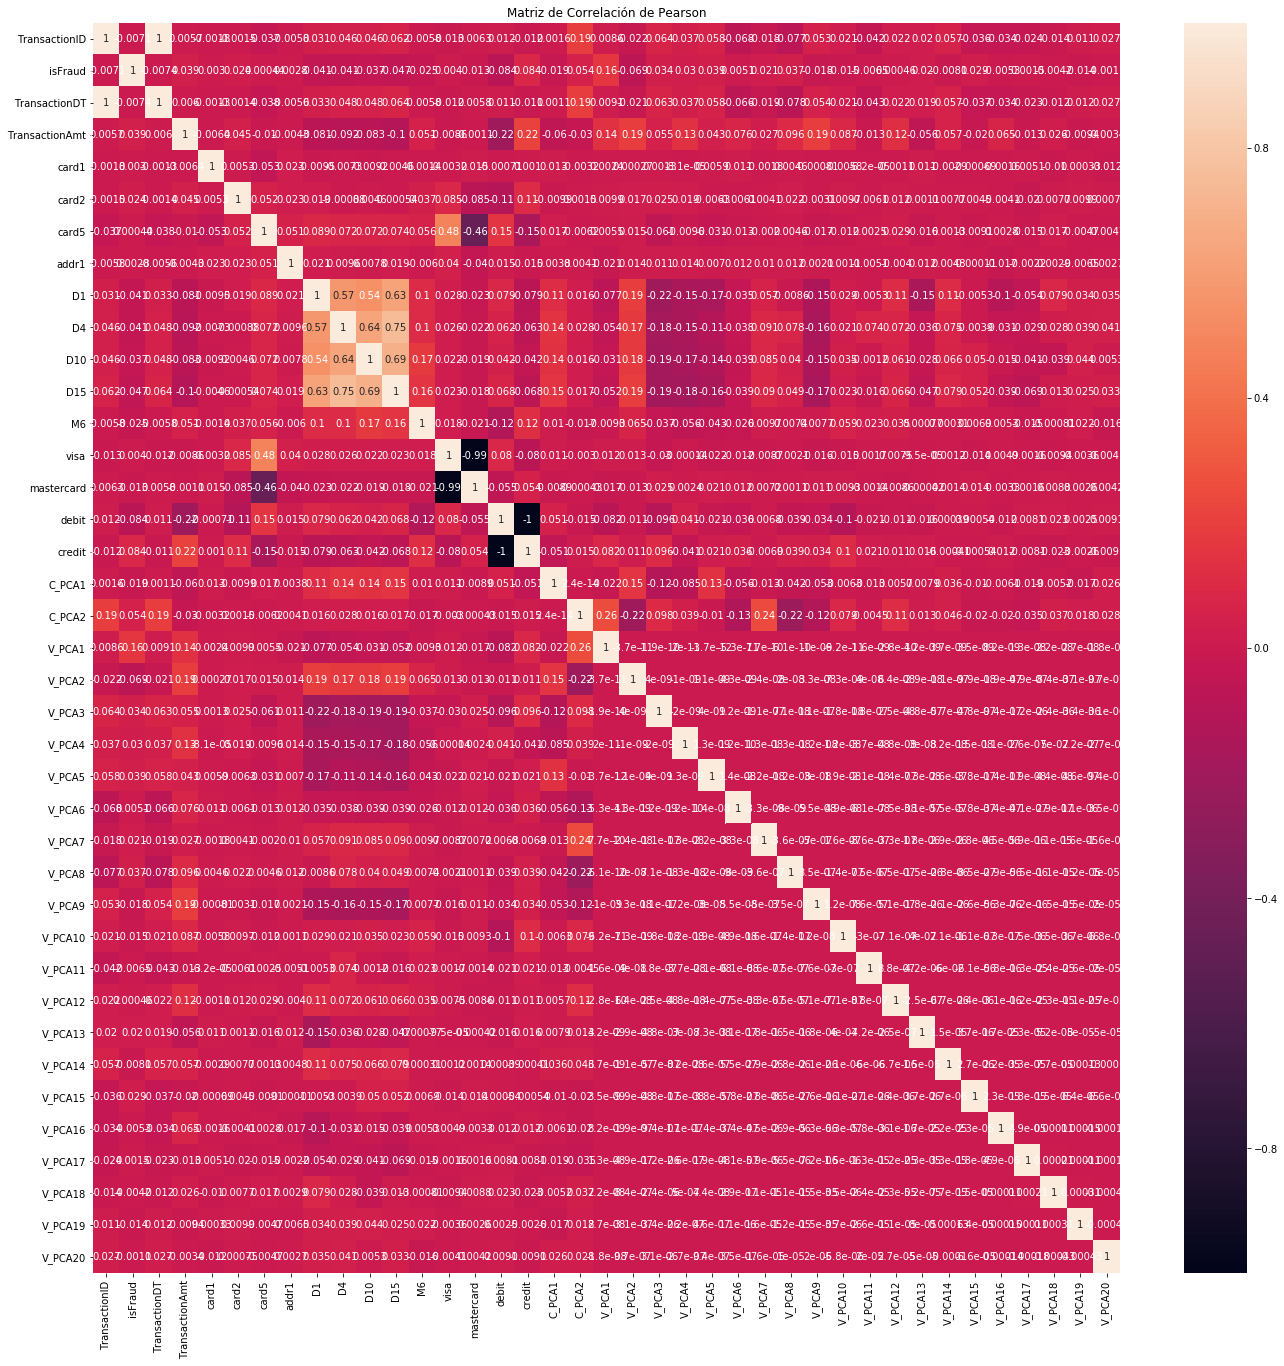

In [100]:
correlation_matrix = Train_sample.corr()
correlation_matrix

plt.figure(figsize=(23.0,23.0))
plt.title('Matriz de Correlación de Pearson')
sns.heatmap(correlation_matrix, annot=True)

* Initial analysis suggests that the target variable correlates more with the set of columns _D_, type of card (debit or credit), and some principal components of columns _C_ and _V_
* Similarly, it can be seen that there are certain columns that do not seem to be related to the target variable and it could be useful to extract them from the database.
* The correlation matrix will be observed only for the top 15 of the most correlated columns.

In [101]:
corrmat = Train_sample.corr()
cols_corrmat = corrmat['isFraud'].abs()
cols_corrmat = cols_corrmat.sort_values(ascending=False)
cols_corrmat.head(39)

isFraud           1.000000
V_PCA1            0.158611
credit            0.083608
debit             0.083558
V_PCA2            0.069052
C_PCA2            0.054079
D15               0.047364
D1                0.041215
D4                0.040691
TransactionAmt    0.039395
V_PCA5            0.039176
V_PCA8            0.037310
D10               0.036693
V_PCA3            0.034353
V_PCA4            0.029810
V_PCA15           0.029453
M6                0.025437
card2             0.023718
V_PCA7            0.020980
V_PCA13           0.019667
C_PCA1            0.019077
V_PCA9            0.018182
V_PCA10           0.014780
V_PCA19           0.014077
mastercard        0.013227
V_PCA14           0.008136
TransactionDT     0.007381
TransactionID     0.007143
V_PCA11           0.006497
V_PCA16           0.005269
V_PCA6            0.005087
V_PCA18           0.004181
visa              0.004032
card1             0.003027
addr1             0.002767
V_PCA17           0.001496
V_PCA20           0.001065
V

* Starting from column 13, the correlation coefficient with _Is Fraud_ falls below 3%, directly or inversely.
* These first 13 columns will be taken for the modeling process.

In [102]:
#Saving final columns in array for modeling process
cols = cols_corrmat.index
cols = cols[0:14]
cols
df_model = Train_new2[cols]
df_model.shape

(328198, 14)

Now I will save the original database, the sample database and the one that will be used in the modeling process in individual CSVs.

In [103]:
Train_new2.to_csv('Train_new2.csv',index=False)
Train_sample.to_csv('Train_sample.csv',index=False)
df_model.to_csv('df_model.csv',index=False)

### Modelling

Continues in a different script